## Método de Mínimos cuadrados no-polinomico 
#### (con una función general)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [18]:
from scipy.optimize import curve_fit
from ipywidgets import interact

In [9]:
curve_fit?

In [68]:
x1 = np.genfromtxt("ej-ajuste-03.txt", usecols = 1)
t1 = np.genfromtxt("ej-ajuste-03.txt", usecols = 0)

In [49]:
def f(x,A,B):
    return A*np.exp(-B*x)

In [63]:
xx = np.linspace(0,3.5,100)


def g(A=1, B=1):
    
    plt.scatter(t1, x1)
    
    plt.xlim(0,3.5)
    plt.ylim(0, 1.2)
    plt.xlabel("Tiempo [s] ")
    plt.ylabel("Posicion [cm]")

    
    chi2 = np.sum((t1 - f(x1, A,B))**2)  
    print(chi2)
    
    plt.grid(True)from scipy.optimize import curve_fit 
    plt.plot(xx, f(xx, A, B), color="red") #ajuste de la curva

In [64]:
interact(g, A=(0,5,0.1), B=(0,5,0.1))

interactive(children=(FloatSlider(value=1.0, description='A', max=5.0), FloatSlider(value=1.0, description='B'…

<function __main__.g(A=1, B=1)>

In [73]:
A_opt, B_opt = curve_fit(f, t1, x1)[0] #entrega los paramétros A y B, (función fácil)

print(A_opt)
print(B_opt)

1.0090419169797906
0.3552315134675165


24.450859882949285


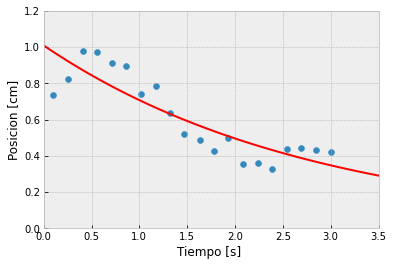

In [67]:
g(A_opt, B_opt)

In [69]:
from scipy.optimize import leastsq  #es más potente pero difícil de usar.

In [82]:
def res(p, x, y):
    return y - (p[0]*np.exp(-p[1]*x))     #residuos: distancia entre los datos(ptos) y la curva ajustada.    

In [83]:
p_init = [1.1, 0.4]     #ajuste aprox (al ojo), la función comienza a trabajar con esa "semilla"

In [74]:
leastsq(res, p_init, args=(t1, x1))[0]  #si nos falla curve_fit, debemos usar leastsq

array([1.0090411 , 0.35523073])